In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
pip install pymc

In [3]:
import pymc as pm
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [4]:
# Load the dataset
file_path1 = "/content/drive/MyDrive/Bayesian_Project/train.csv"
file_path2 = "/content/drive/MyDrive/Bayesian_Project/test.csv"

train = pd.read_csv(file_path1)
test = pd.read_csv(file_path2)


In [5]:
train.head()

,Interest_Rate,Loan_Amount_Requested,Number_of_Payments,Years_Employed,Annual_Income,Income_Verified,Loan_Category,State,Debt_to_Income_Ratio,Delinquencies_2Y,Credit_Inquiries_6M,Derogatory_Public_Records,Total_Credit_Revolving_Balance,Revolving_Utilization_Rate,Total_Credit_Lines,Initial_Listing_Status,Days_Between_X15_X23,Funded_to_Requested_Ratio,Loan_to_Income_Ratio,Active_Credit_Line_Ratio
0,12.12,0.653888,1,1,0.754974,0,4,42,-0.530104,-0.333534,-0.783783,-0.250851,0.767728,0.220724,-0.377620,0,1.183949,0.084002,-0.336270,-0.543773
1,11.14,0.752423,0,0,-0.000577,2,2,4,-0.664851,-0.333534,-0.783783,-0.250851,0.271488,1.030576,-1.002825,0,-0.283561,0.084002,0.583870,-0.505864
2,17.27,-0.725600,0,9,-0.306881,1,2,33,-0.914530,-0.333534,-0.783783,-0.250851,0.052635,0.852904,-0.466935,0,-1.269577,0.084002,-0.630514,-0.772283
3,7.62,-0.627065,0,5,-0.286461,1,11,39,-1.386145,-0.333534,0.178156,-0.250851,-0.832042,-2.345186,-0.734880,0,-0.666812,0.084002,-0.529315,-0.088861
4,14.65,2.599952,1,1,-0.204780,0,6,39,-1.121935,-0.333534,0.178156,-0.250851,-0.034853,-0.175939,-0.198990,0,0.570387,0.084002,3.160687,0.745145


In [6]:
test.head()

,Interest_Rate,Loan_Amount_Requested,Number_of_Payments,Years_Employed,Annual_Income,Income_Verified,Loan_Category,State,Debt_to_Income_Ratio,Delinquencies_2Y,Credit_Inquiries_6M,Derogatory_Public_Records,Total_Credit_Revolving_Balance,Revolving_Utilization_Rate,Total_Credit_Lines,Initial_Listing_Status,Days_Between_X15_X23,Funded_to_Requested_Ratio,Loan_to_Income_Ratio,Active_Credit_Line_Ratio
0,11.14,-0.479263,0,6,-0.449824,2,1,27,-0.789030,1.139301,-0.783783,-0.250851,0.046667,-0.977527,-0.377620,0,0.844241,0.084002,-0.086103,-0.366863
1,11.14,-0.725600,0,7,-0.756128,2,2,34,0.348395,-0.333534,-0.783783,-0.250851,0.125778,0.047184,-0.198990,0,-0.272405,0.084002,0.209060,-0.783866
2,13.11,-1.064314,0,1,-0.459932,0,1,27,1.377494,-0.333534,-0.783783,-0.250851,0.360024,0.980993,-0.377620,0,0.187856,0.084002,-0.933027,-0.150639
3,7.62,-1.095106,0,8,-1.042625,2,2,4,0.693189,-0.333534,-0.783783,-0.250851,-0.617326,-1.791512,0.515531,0,-0.338979,0.084002,0.392177,0.340779
4,13.53,-0.048173,0,4,-0.408983,2,2,5,0.217611,-0.333534,0.178156,2.196541,-0.077263,0.489297,-1.270770,0,2.246616,0.084002,0.447814,-0.922867


In [7]:
target_col = "Interest_Rate"
X_train = train.drop(columns=[target_col]).values
y_train = train[target_col].values
X_test = test.drop(columns=[target_col]).values
y_test = test[target_col].values

In [8]:
with pm.Model() as model:
    # Priors for coefficients and intercept
    alpha = pm.Normal("alpha", mu=0, sigma=10)
    beta = pm.Normal("beta", mu=0, sigma=10, shape=X_train.shape[1])
    sigma = pm.HalfNormal("sigma", sigma=1)

    # Likelihood
    mu = alpha + pm.math.dot(X_train, beta)
    y_obs = pm.Normal("y_obs", mu=mu, sigma=sigma, observed=y_train)

    # Inference using MCMC sampling
    trace = pm.sample(1000, tune=1000, cores=2)


 Progress                    Draws   Divergences   Step size   Grad evals   Sampling Speed   Elapsed   Remaining  
 ───────────────────────────────────────────────────────────────────────────────────────────────────────────────── 
  ━━━━━━━━━━━━━━━━━━━━━━━━━   2000    0             0.37        15           3.89 draws/s     0:08:34   0:00:00    
  ━━━━━━━━━━━━━━━━━━━━━━━━━   2000    0             0.39        15           4.01 draws/s     0:08:18   0:00:00

In [9]:
with model:
    posterior_predictive = pm.sample_posterior_predictive(trace)

Sampling ... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00 / 0:00:14

In [17]:
print("Available keys in posterior_predictive:", posterior_predictive.posterior_predictive.keys())

Available keys in posterior_predictive: KeysView(<xarray.Dataset> Size: 3GB
Dimensions:      (chain: 2, draw: 1000, y_obs_dim_2: 161620)
Coordinates:
  * chain        (chain) int64 16B 0 1
  * draw         (draw) int64 8kB 0 1 2 3 4 5 6 ... 993 994 995 996 997 998 999
  * y_obs_dim_2  (y_obs_dim_2) int64 1MB 0 1 2 3 ... 161616 161617 161618 161619
Data variables:
    y_obs        (chain, draw, y_obs_dim_2) float64 3GB 16.49 11.63 ... 11.27
Attributes:
    created_at:                 2025-03-10T01:22:30.584896+00:00
    arviz_version:              0.20.0
    inference_library:          pymc
    inference_library_version:  5.20.1)


In [11]:
y_pred = posterior_predictive.posterior_predictive["y_obs"].mean(dim=("chain", "draw")).values

In [12]:
y_pred = y_pred[:len(y_test)]

In [13]:
# Compute evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [14]:
# Print results
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R-squared: {r2}")

RMSE: 5.297210757897461
MAE: 4.263693111504587
MSE: 28.060441813584596
R-squared: -0.4477886622995131


Output()

Effective Sample Size (ESS):
<xarray.Dataset> Size: 320B
Dimensions:     (beta_dim_0: 19)
Coordinates:
  * beta_dim_0  (beta_dim_0) int64 152B 0 1 2 3 4 5 6 7 ... 12 13 14 15 16 17 18
Data variables:
    alpha       float64 8B 2.458e+03
    beta        (beta_dim_0) float64 152B 2.137e+03 3.006e+03 ... 3.304e+03
    sigma       float64 8B 3.965e+03

Gelman-Rubin Statistic (R-hat):
<xarray.Dataset> Size: 320B
Dimensions:     (beta_dim_0: 19)
Coordinates:
  * beta_dim_0  (beta_dim_0) int64 152B 0 1 2 3 4 5 6 7 ... 12 13 14 15 16 17 18
Data variables:
    alpha       float64 8B 1.001
    beta        (beta_dim_0) float64 152B 1.001 1.0 1.0 ... 0.9993 0.9997 1.0
    sigma       float64 8B 1.002


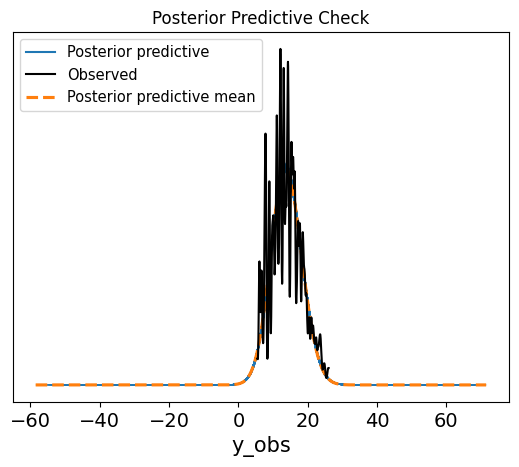

In [19]:
import arviz as az
import matplotlib.pyplot as plt
import pymc as pm

# 1️⃣ Compute **Effective Sample Size (ESS)** and **Gelman-Rubin Statistic (R-hat)**
ess = az.ess(trace)  # Effective Sample Size
r_hat = az.rhat(trace)  # Gelman-Rubin statistic

# Print results
print("Effective Sample Size (ESS):")
print(ess)

print("\nGelman-Rubin Statistic (R-hat):")
print(r_hat)

# 2️⃣ Posterior Predictive Check (PPC)
with model:
    ppc = pm.sample_posterior_predictive(trace, var_names=["y_obs"])

# 3️⃣ Convert PPC manually to an ArviZ InferenceData object
ppc_data = az.convert_to_inference_data(ppc)

# 4️⃣ Plot Posterior Predictive Check
az.plot_ppc(ppc_data, mean=True)
plt.title("Posterior Predictive Check")
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

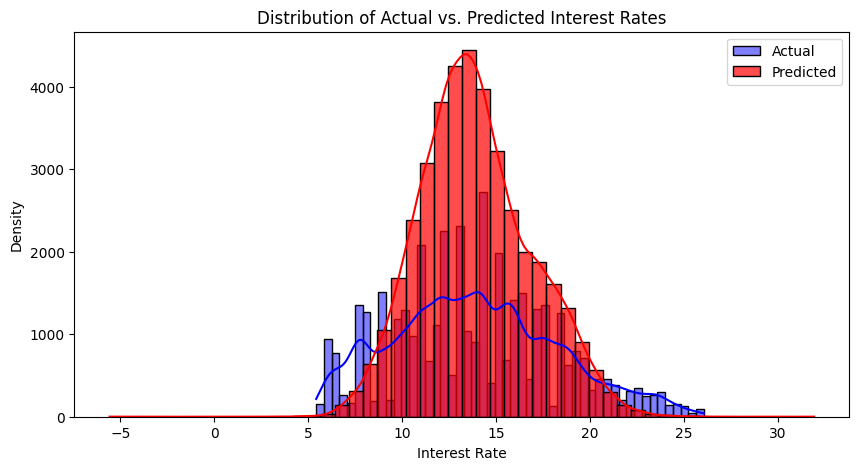

In [ ]:
# 1️⃣ Histogram: Compare Distributions
plt.figure(figsize=(10, 5))
sns.histplot(y_test, label="Actual", color="blue", kde=True, bins=50)
sns.histplot(y_pred, label="Predicted", color="red", kde=True, bins=50, alpha=0.7)
plt.xlabel("Interest Rate")
plt.ylabel("Density")
plt.title("Distribution of Actual vs. Predicted Interest Rates")
plt.legend()
plt.show()


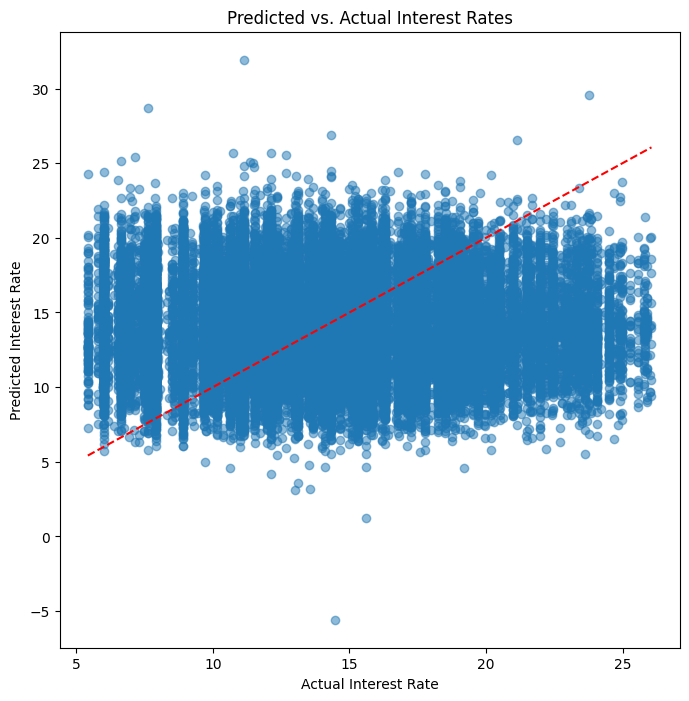

In [ ]:
# 2️⃣ Scatter Plot: Predictions vs. Actual
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--")  # y = x line
plt.xlabel("Actual Interest Rate")
plt.ylabel("Predicted Interest Rate")
plt.title("Predicted vs. Actual Interest Rates")
plt.show()


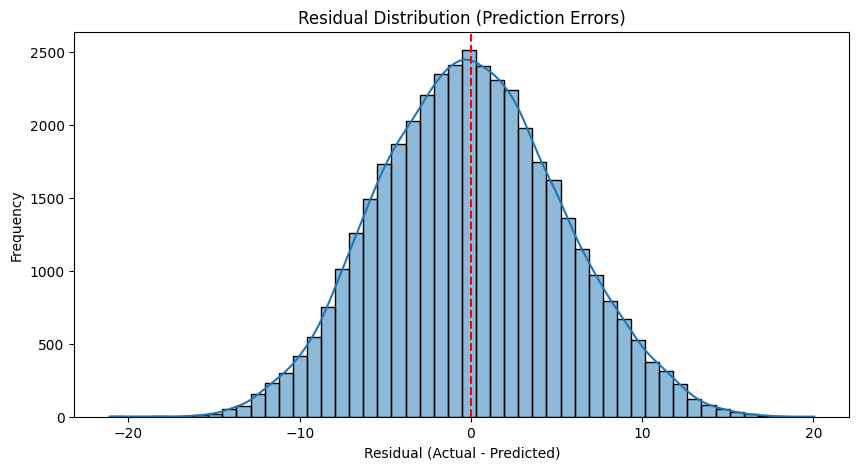

In [ ]:
# 3️⃣ Residual Plot: Errors in Prediction
residuals = y_test - y_pred
plt.figure(figsize=(10, 5))
sns.histplot(residuals, kde=True, bins=50)
plt.axvline(0, color="red", linestyle="--")  # Mark zero error line
plt.xlabel("Residual (Actual - Predicted)")
plt.ylabel("Frequency")
plt.title("Residual Distribution (Prediction Errors)")
plt.show()

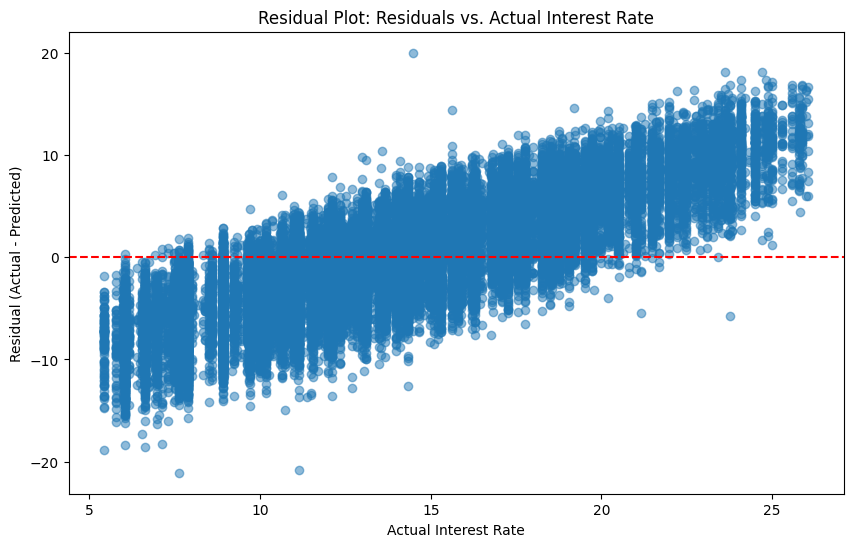

In [ ]:
# 4️⃣ Residual Plot: Residuals vs. Actual Interest Rate
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals, alpha=0.5)
plt.axhline(0, color="red", linestyle="--")  # Zero residual line
plt.xlabel("Actual Interest Rate")
plt.ylabel("Residual (Actual - Predicted)")
plt.title("Residual Plot: Residuals vs. Actual Interest Rate")
plt.show()